- https://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [296]:
import sklearn

sklearn.__version__

'0.21.3'

In [297]:
!pip3 install scikit-learn --upgrade

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [299]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

In [300]:
x = np.linspace(0, 2* np.pi, 100)
y = np.sin(x) + .5*np.random.random(100)

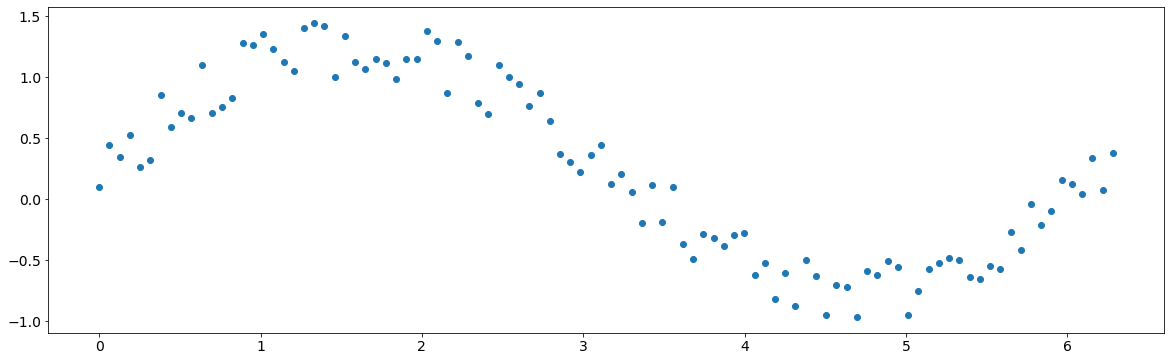

In [301]:
plt.scatter(x, y)

In [302]:
from sklearn import tree

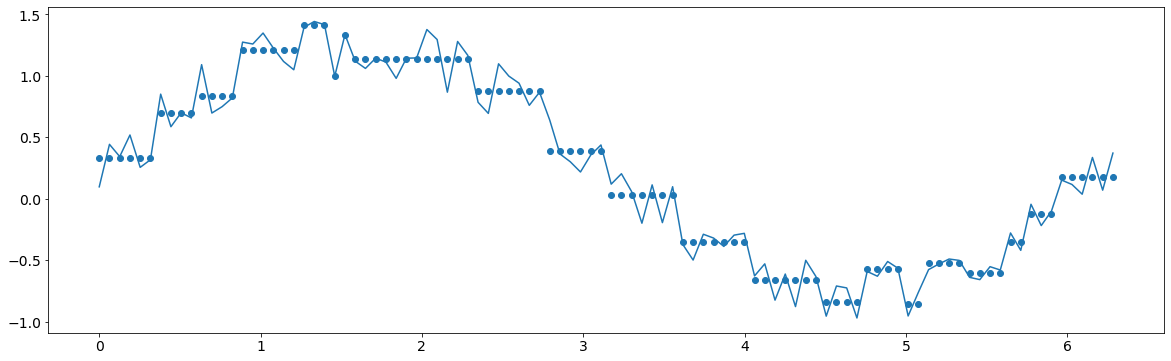

In [303]:
regression = tree.DecisionTreeRegressor(max_depth=8, min_samples_split=8)
regression.fit(x.reshape(-1, 1), y)

yp = regression.predict(x.reshape(-1,1))

plt.scatter(x, yp)
plt.plot(x, y)

In [304]:
regression.predict([[2]])

array([1.14123688])

In [305]:
path = regression.decision_path(x.reshape(-1, 1))

In [306]:
path.todense()

matrix([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1]], dtype=int64)

[Text(558.0, 308.04, 'X[0] <= 3.142\nmse = 0.523\nsamples = 100\nvalue = 0.254'),
 Text(223.2, 271.8, 'X[0] <= 0.349\nmse = 0.135\nsamples = 50\nvalue = 0.883'),
 Text(167.39999999999998, 235.56, 'mse = 0.018\nsamples = 6\nvalue = 0.329'),
 Text(279.0, 235.56, 'X[0] <= 2.761\nmse = 0.103\nsamples = 44\nvalue = 0.959'),
 Text(223.2, 199.32000000000002, 'X[0] <= 0.857\nmse = 0.057\nsamples = 38\nvalue = 1.049'),
 Text(111.6, 163.08, 'X[0] <= 0.603\nmse = 0.021\nsamples = 8\nvalue = 0.77'),
 Text(55.8, 126.84, 'mse = 0.009\nsamples = 4\nvalue = 0.699'),
 Text(167.39999999999998, 126.84, 'mse = 0.023\nsamples = 4\nvalue = 0.84'),
 Text(334.79999999999995, 163.08, 'X[0] <= 2.317\nmse = 0.04\nsamples = 30\nvalue = 1.124'),
 Text(279.0, 126.84, 'X[0] <= 1.428\nmse = 0.022\nsamples = 23\nvalue = 1.198'),
 Text(167.39999999999998, 90.60000000000002, 'X[0] <= 1.238\nmse = 0.016\nsamples = 9\nvalue = 1.281'),
 Text(111.6, 54.360000000000014, 'mse = 0.01\nsamples = 6\nvalue = 1.213'),
 Text(223.2,

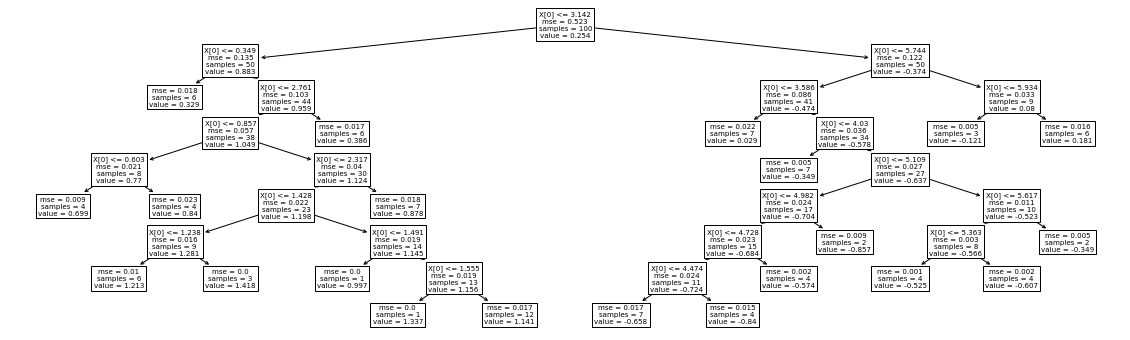

In [307]:
tree.plot_tree(regression)

In [308]:
bikeshare = pd.read_csv('../data/bikeshare_daily_agg.csv', index_col='hour_of_day')

In [309]:
bikeshare

,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


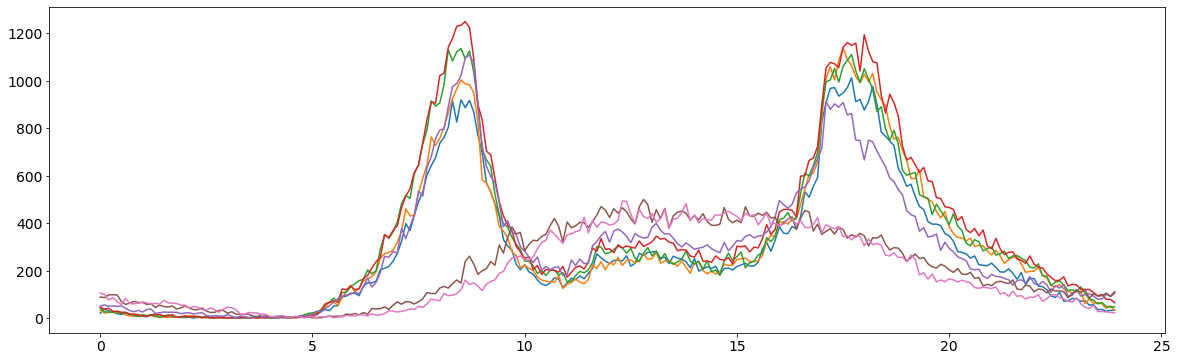

In [310]:
plt.plot(bikeshare)

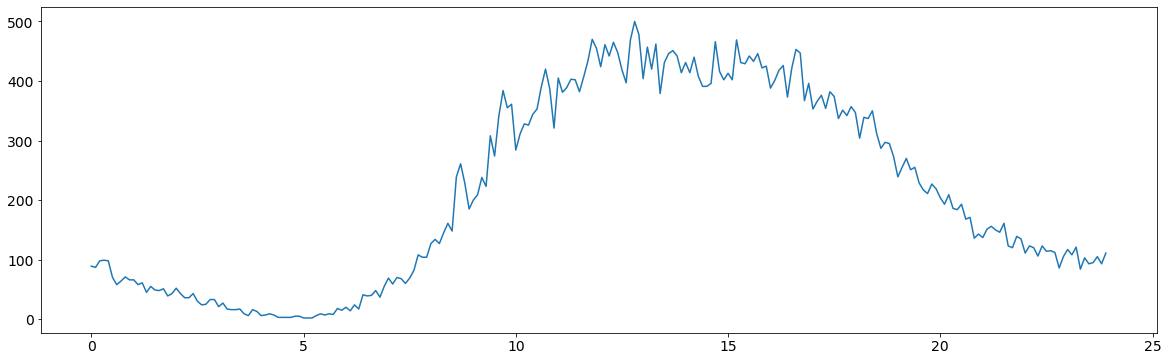

In [311]:
plt.plot(bikeshare['5'])

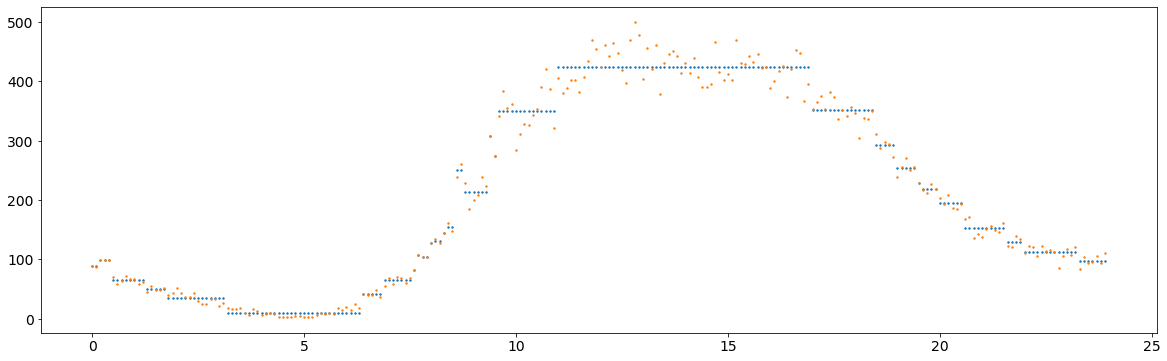

In [312]:
hours = bikeshare.index.values.reshape(-1,1)

bike_reg = tree.DecisionTreeRegressor(max_depth=5)
bike_reg.fit(hours, bikeshare['5'].fillna(0))

bike_pred = bike_reg.predict(hours)

plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, bikeshare['5'], s=2)

# Use the bikeshare dataset (see above) and choose a weekday (0,1,2,3,4).

# 1. Create 5 Decision Tree Regressors using `max_depth=4,5,6,7,8`. For each one of these models, calculate the MSE between the predicted values from the model (`bike_pred`) and the actual values (`bikeshare['n']`). Create a plot showing the predictions along with the actuals. You may also show the `print_tree()` for a sanity check as well.

In [313]:
from sklearn.metrics import mean_squared_error

In [314]:
hours = bikeshare.index.values.reshape(-1,1)
x = bikeshare['0'].fillna(0)

### Plot and MSE for Depth 4

In [315]:
bike_reg = tree.DecisionTreeRegressor(max_depth = 4)
bike_reg.fit(hours, x)

bike_pred = bike_reg.predict(hours)

In [316]:
mean_squared_error(x, bike_pred)

10485.50192299583

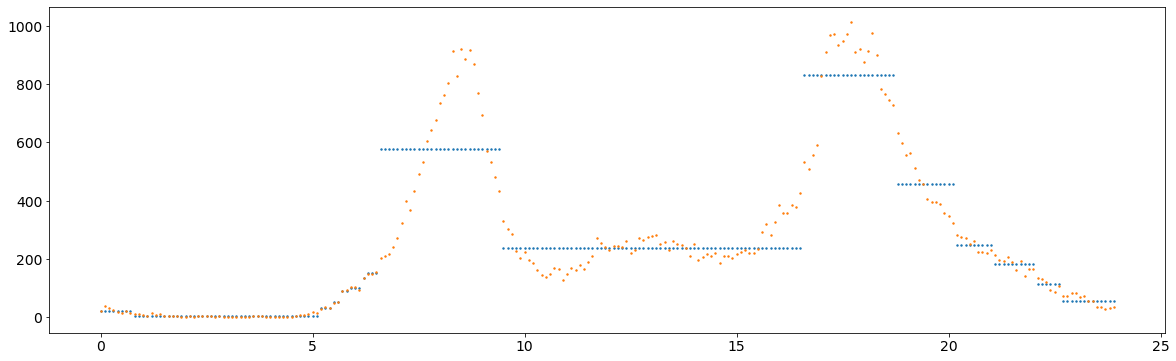

In [317]:
plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, x, s=2)

### Plot and MSE for Depth 5

In [318]:
bike_reg = tree.DecisionTreeRegressor(max_depth = 5)
bike_reg.fit(hours, x)

bike_pred = bike_reg.predict(hours)

mean_squared_error(x, bike_pred)

3452.6521680267956

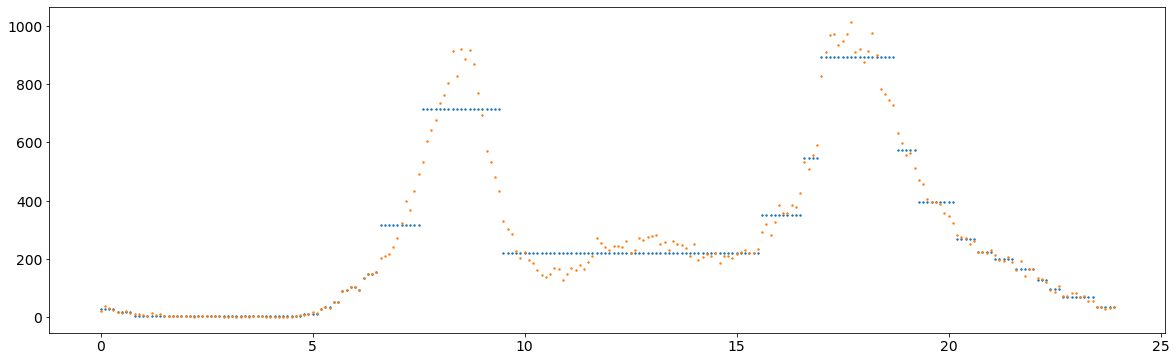

In [319]:
plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, x, s=2)

### Plot and MSE for Depth 6

In [320]:
bike_reg = tree.DecisionTreeRegressor(max_depth = 6)
bike_reg.fit(hours, x)

bike_pred = bike_reg.predict(hours)

mean_squared_error(x, bike_pred)

1536.1039390470642

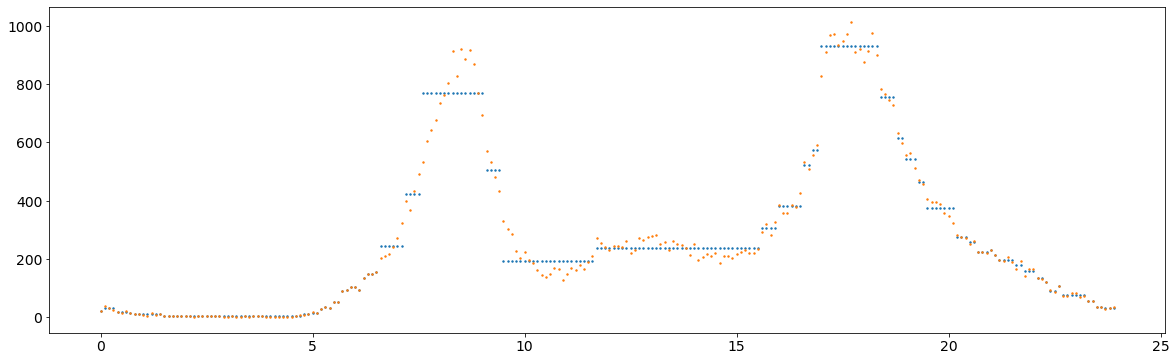

In [321]:
plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, x, s=2)

### Plot and MSE for Depth 7

In [322]:
bike_reg = tree.DecisionTreeRegressor(max_depth = 7)
bike_reg.fit(hours, x)

bike_pred = bike_reg.predict(hours)

mean_squared_error(x, bike_pred)

530.0101716049259

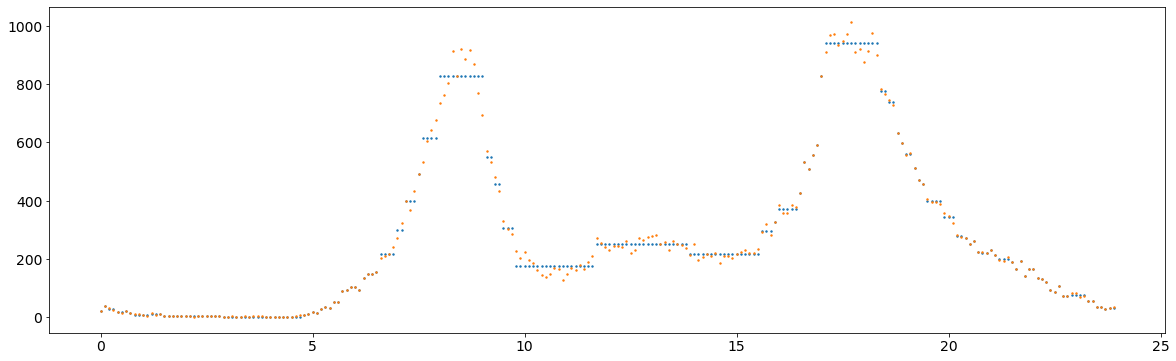

In [323]:
plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, x, s=2)

### Plot and MSE for Depth 8

In [324]:
bike_reg = tree.DecisionTreeRegressor(max_depth = 8)
bike_reg.fit(hours, x)

bike_pred = bike_reg.predict(hours)

mean_squared_error(x, bike_pred)

303.154213022816

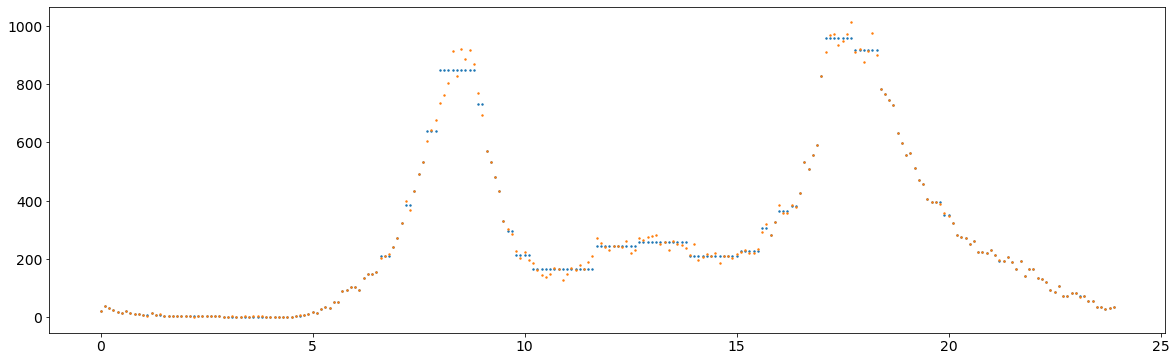

In [325]:
plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, x, s=2)

# 2. Using the 5 models created with various `max_depth` values, calculate the MSE between the predicted values (`bike_pred`) and values from all of the weekdays [`0,1,2,3,4`]. You should have 25 total MSE values, 5 values for each `max_depth`. 

### Create function to create matrix of MSEs

Takes argument of day to train model one. 

In [326]:
def bike_model(day_of_week):
    results = np.zeros([5,5])
    for depth in [4,5,6,7,8]:
        for day in [0,1,2,3,4]:
            bike_reg = tree.DecisionTreeRegressor(max_depth = depth)
            bike_reg.fit(hours, bikeshare.iloc[:,[day_of_week]].fillna(0))
            bike_pred = bike_reg.predict(hours)
            results[depth - 4, day] = mean_squared_error(bikeshare.iloc[:,[day]].fillna(0), bike_pred)
    results = pd.DataFrame(results, index = [4, 5, 6, 7, 8])
    results.index.name = "Max Depth"
    results.rename(columns = {0: 'Day_0', 1: 'Day_1', 2: 'Day_2', 3: 'Day_3', 4:'Day_4'})
    return results

### MSEs using model trained on day 0

In [327]:
bike_model(0)

,0,1,2,3,4
Max Depth,,,,,
4,10485.501923,14152.952163,18453.529945,27078.652524,17006.747733
5,3452.652168,6542.337660,10658.640132,17196.751811,10302.018421
6,1536.103939,4110.620299,7636.501572,13957.005781,8084.686057
7,530.010172,3102.266865,6543.280159,12443.479313,6626.382620
8,303.154213,2673.256745,6038.400676,11924.415400,6094.183508


# 3. (2 cont'd) Describe which max_depth you would recommend based on the groups of MSE values. Use the idea of generality of the model for your argument along with the MSE values as proof.

I recommend using a max depth of 8. This is because the MSE is the lowest for each day of the work week. This is true using a model trained on day 0 (see question 2) and trained using the other days of the work week (see below).

For example, the MSEs for max depth 8 using the day 0 model are: 
+ 303.154213
+ 2673.256745
+ 6038.400676
+ 11924.415400
+ 6094.183508

For each day these MSEs are the lowest of any depth.

### MSEs using model trained on day 1

In [328]:
bike_model(1)

,0,1,2,3,4
Max Depth,,,,,
4,12625.180344,12539.567663,15844.793094,21721.814061,20413.196998
5,5710.235036,4672.020956,7918.734944,11437.530241,13802.045896
6,3819.384580,1860.595774,4476.458667,8392.952508,11857.642891
7,2741.319501,746.515568,3347.125549,6903.726975,9913.008645
8,2472.939842,273.628195,2847.269275,6162.728415,9513.645165


### MSEs using model trained on day 2

In [329]:
bike_model(2)

,0,1,2,3,4
Max Depth,,,,,
4,16200.667149,15114.876464,12346.810801,16400.019858,13739.871225
5,10579.826220,8084.399601,6101.514952,8476.439264,12681.661379
6,7088.172542,4200.267553,1669.162119,4047.295478,9487.773182
7,5955.647450,3006.770403,596.244331,2648.647442,9019.185180
8,5792.606879,2847.666381,300.702918,2474.806257,8853.029768


### MSEs using model trained on day 3

In [330]:
bike_model(3)

,0,1,2,3,4
Max Depth,,,,,
4,25846.490455,21932.868251,17140.728189,17547.478167,26065.379114
5,16404.404370,11494.046238,7037.512555,6327.176585,16631.384859
6,13054.353771,7277.780925,3727.292741,1901.085573,16219.536303
7,11811.946434,6232.436841,2655.047506,653.292127,14772.239374
8,11633.458958,5931.112358,2393.834573,268.902034,14571.566459


### MSEs using model trained on day 4

In [331]:
bike_model(4)

,0,1,2,3,4
Max Depth,,,,,
4,14230.202363,18991.174530,18871.202665,25570.995427,8532.583734
5,11514.010921,15970.820228,15029.070268,21841.638841,4812.077249
6,6528.200215,10251.573755,9856.360460,15735.643149,1697.704854
7,6345.186429,10067.489732,9452.756714,15505.527077,767.200315
8,5796.486042,9275.112986,8892.546558,14768.959494,168.238125
